In [1]:
import os
import pandas as pd
from powersimdata.utility.helpers import PrintManager

from postreise.plot.plot_bar_generation_vs_capacity import (
    plot_bar_generation_vs_capacity,
    make_gen_cap_custom_data,
)

### Vertical Bar Plot

100%|##########| 454k/454k [00:01<00:00, 306kb/s]  
100%|##########| 40.1k/40.1k [00:00<00:00, 63.7kb/s]
100%|##########| 454k/454k [00:01<00:00, 312kb/s]  
100%|##########| 40.1k/40.1k [00:00<00:00, 63.1kb/s]


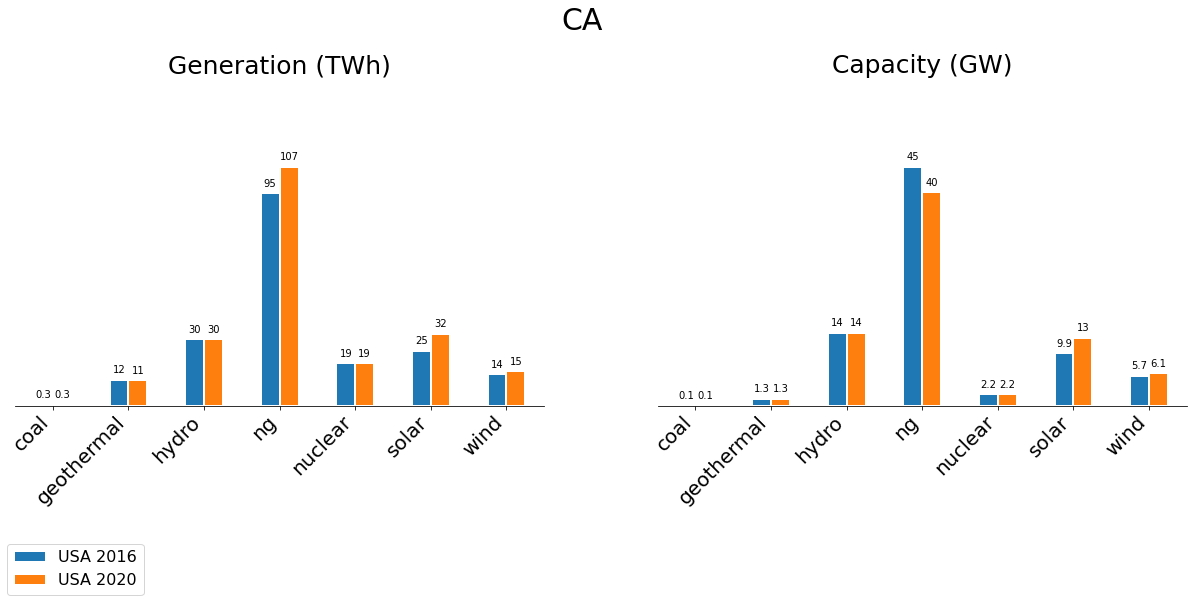

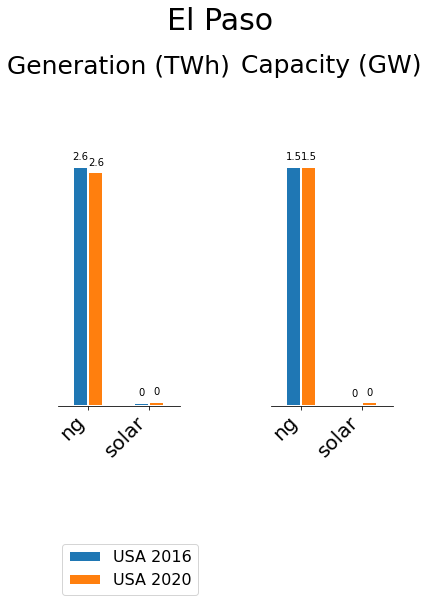

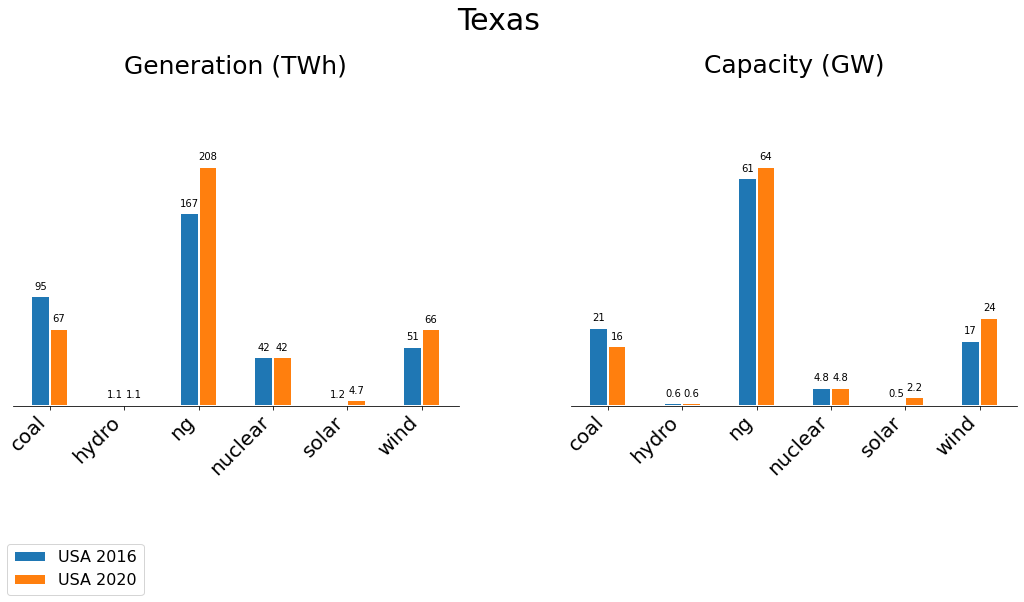

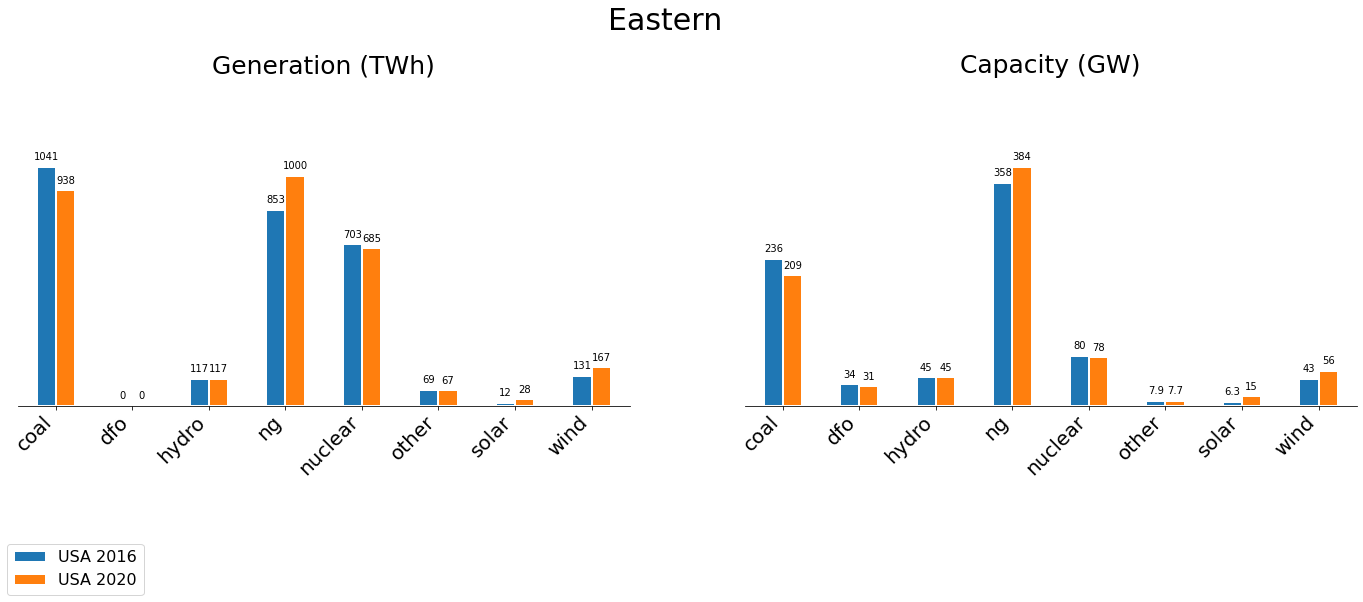

In [2]:
with PrintManager():
    plot_bar_generation_vs_capacity(
        areas=["CA", "El Paso", "Texas", "Eastern"], 
        area_types=[None, None, "interconnect", None], 
        scenario_ids=[823, 824], 
        scenario_names=["USA 2016", "USA 2020"]
    )

### Horizontal Bar Plot

100%|##########| 454k/454k [00:01<00:00, 302kb/s]  
100%|##########| 40.1k/40.1k [00:00<00:00, 60.7kb/s]
100%|##########| 454k/454k [00:01<00:00, 333kb/s]  
100%|##########| 40.1k/40.1k [00:00<00:00, 64.8kb/s]


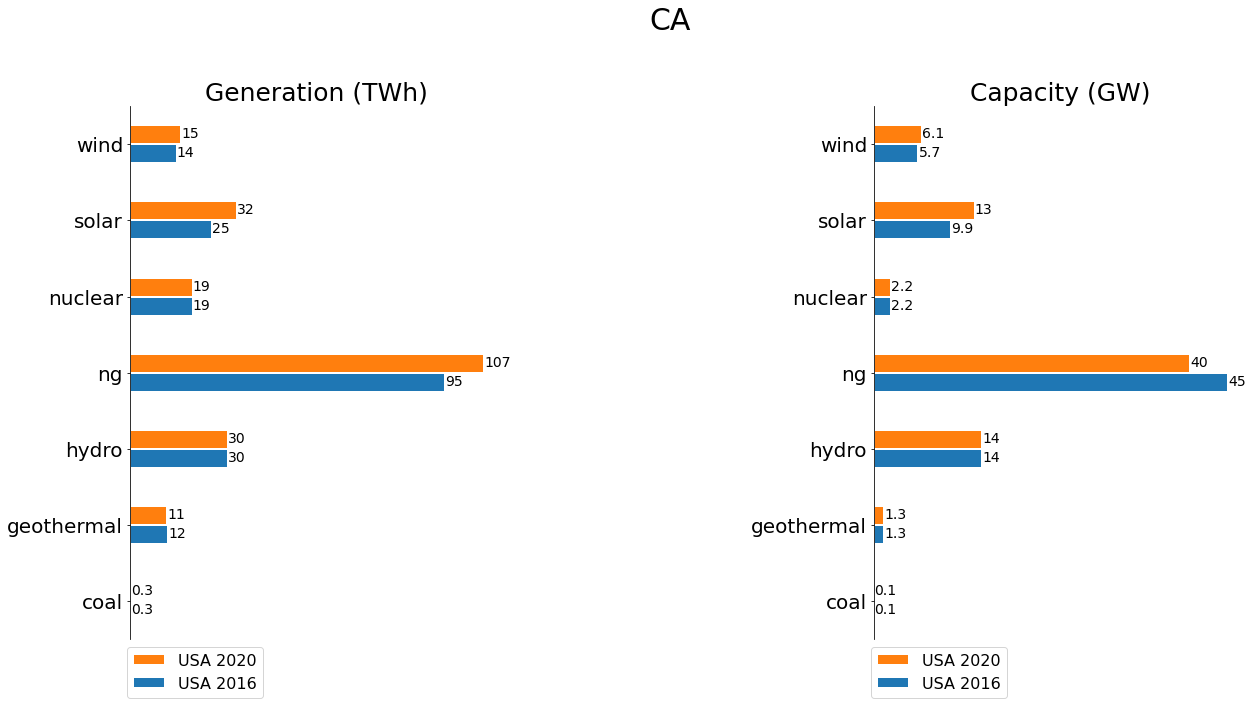

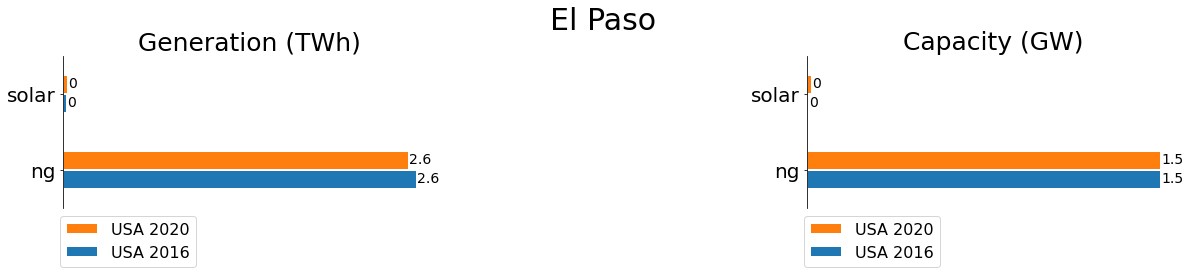

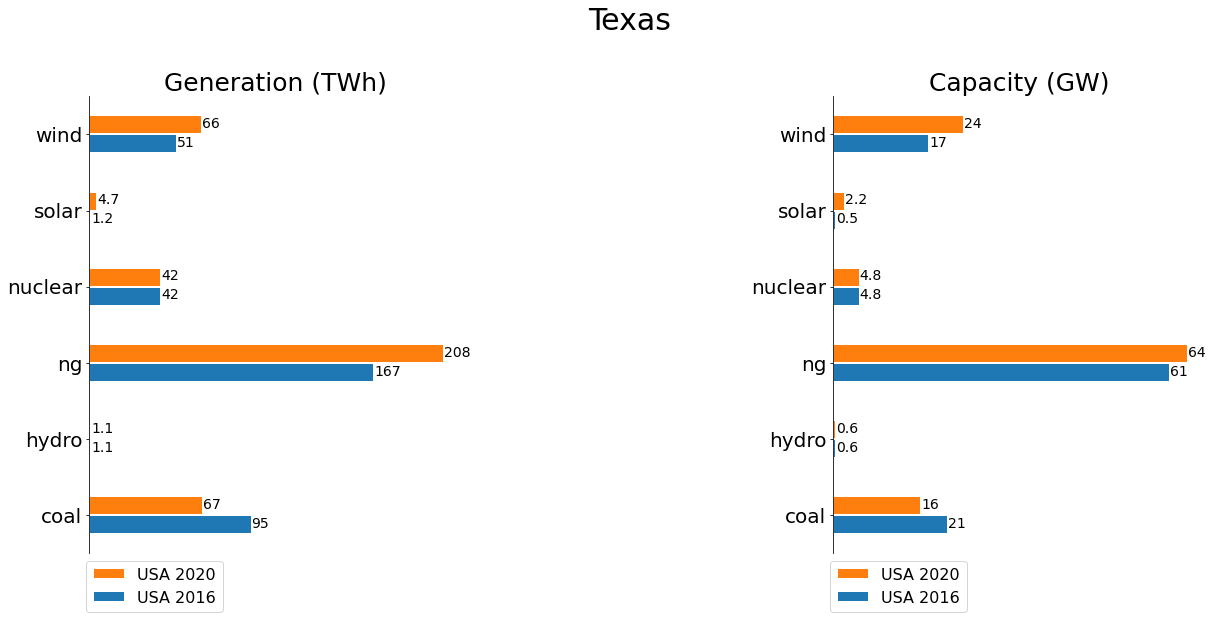

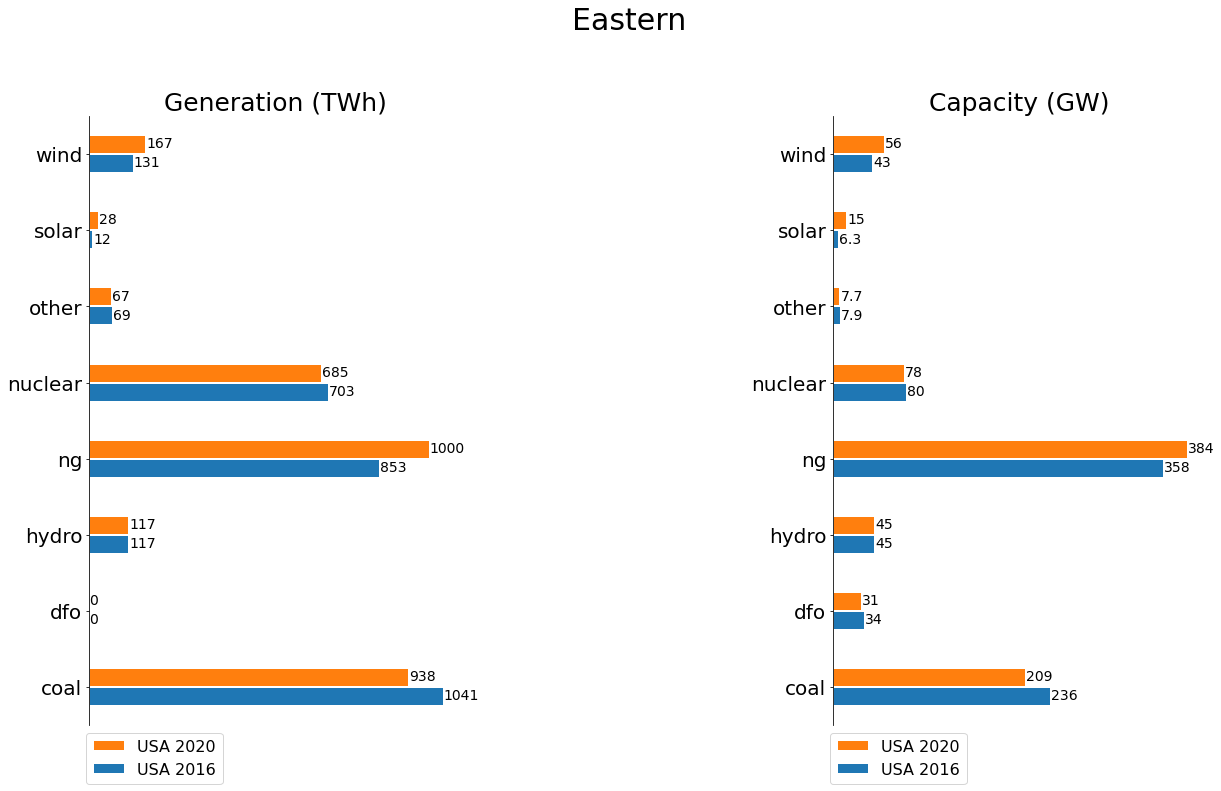

In [3]:
with PrintManager():
    plot_bar_generation_vs_capacity(
        areas=["CA", "El Paso", "Texas", "Eastern"], 
        area_types=[None, None, "interconnect", None], 
        scenario_ids=[823, 824], 
        scenario_names=["USA 2016", "USA 2020"],
        horizontal=True
    )

### Add Custom Data

In [4]:
data_dir = os.path.join(os.getcwd(), '../../data')
western_hist_gen = pd.read_csv(os.path.join(data_dir, '2016_Historical_Western_Generation_TWh.csv'),
                                              index_col='Resource Type')
western_hist_cap = pd.read_csv(os.path.join(data_dir, '2016_Historical_Western_Capacity_GW.csv'),
                                              index_col='Resource Type')
nrel_low_demand_gen = pd.read_csv(os.path.join(data_dir, '2016_NREL_Low_Demand_Western_Generation_TWh.csv'),
                                                 index_col='Resource Type')
nrel_mid_case_gen = pd.read_csv(os.path.join(data_dir, '2016_NREL_Mid_Case_Western_Generation_TWh.csv'),
                                               index_col='Resource Type')

In [5]:
interest_areas = ["Washington", "Arizona", "California", "Wyoming", "Western"]

In [6]:
western_hist = make_gen_cap_custom_data(
    interest_areas, 
    '2016 Historical Western Data',
    gen_data=western_hist_gen, 
    cap_data=western_hist_cap)

nrel_low_demand = make_gen_cap_custom_data(
    interest_areas, 
    'NREL Low Demand Baseline',
    gen_data=nrel_low_demand_gen, 
    cap_data=None) # We don't have capacity data so leave it blank

nrel_mid_case = make_gen_cap_custom_data(
    interest_areas, 
    '2016 NREL Mid Case',
    gen_data=nrel_mid_case_gen, 
    cap_data=None) # We don't have capacity data so leave it blank

custom_data = [western_hist, nrel_low_demand, nrel_mid_case]

100%|##########| 454k/454k [00:01<00:00, 313kb/s]  
100%|##########| 40.1k/40.1k [00:00<00:00, 62.8kb/s]


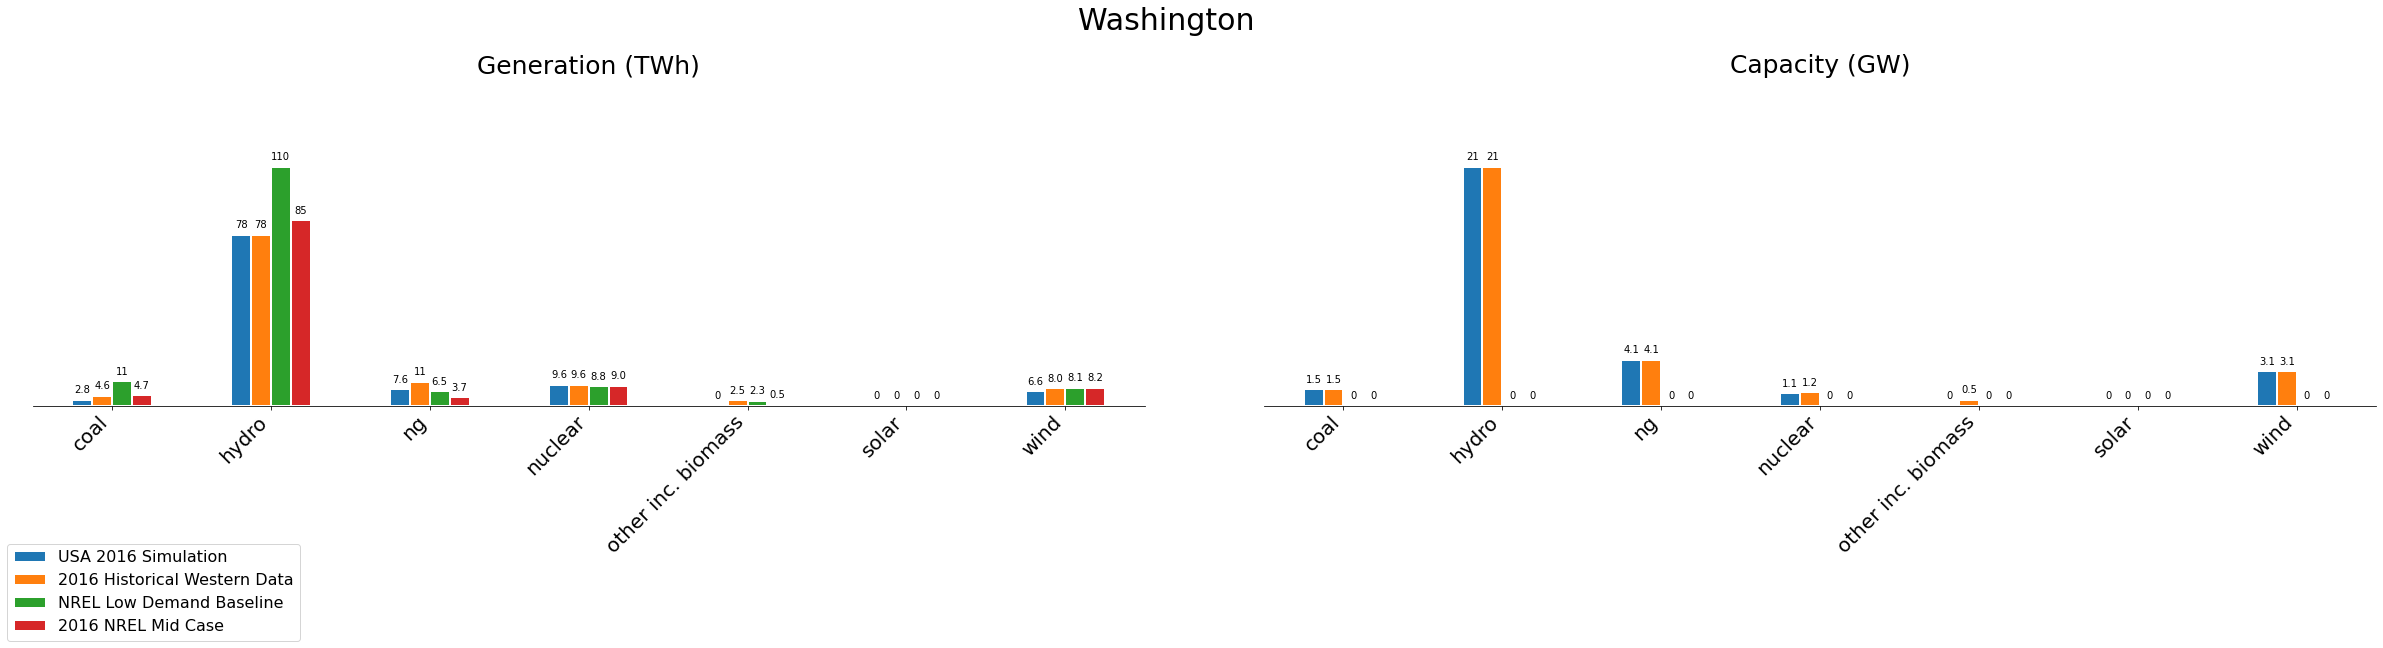

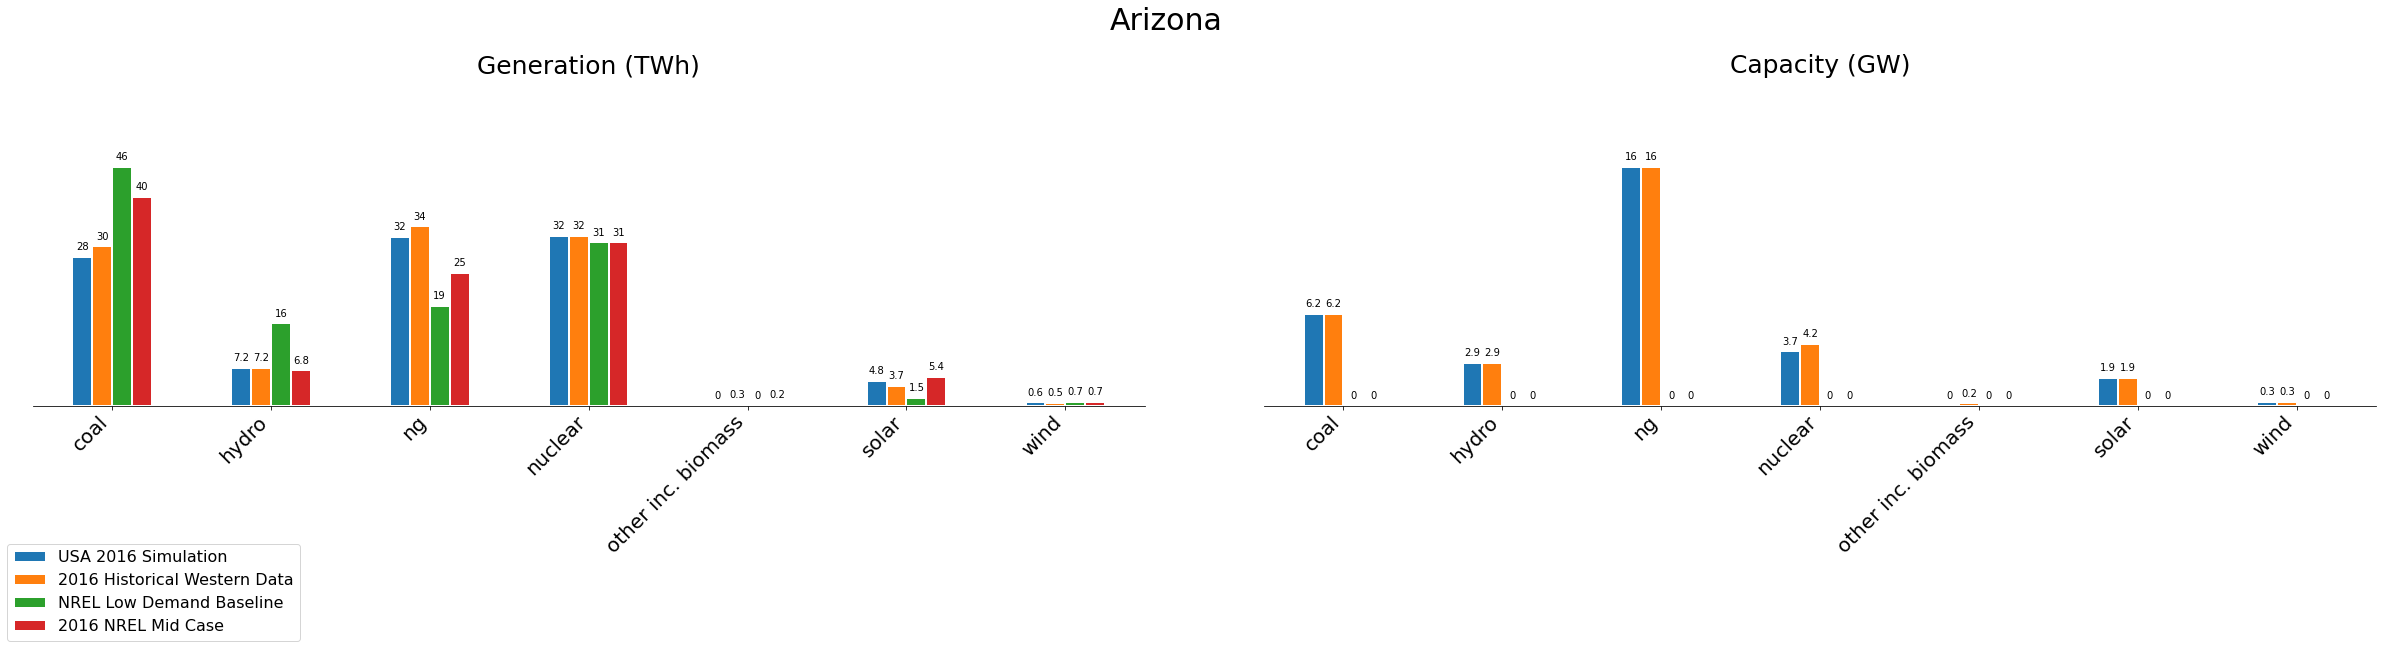

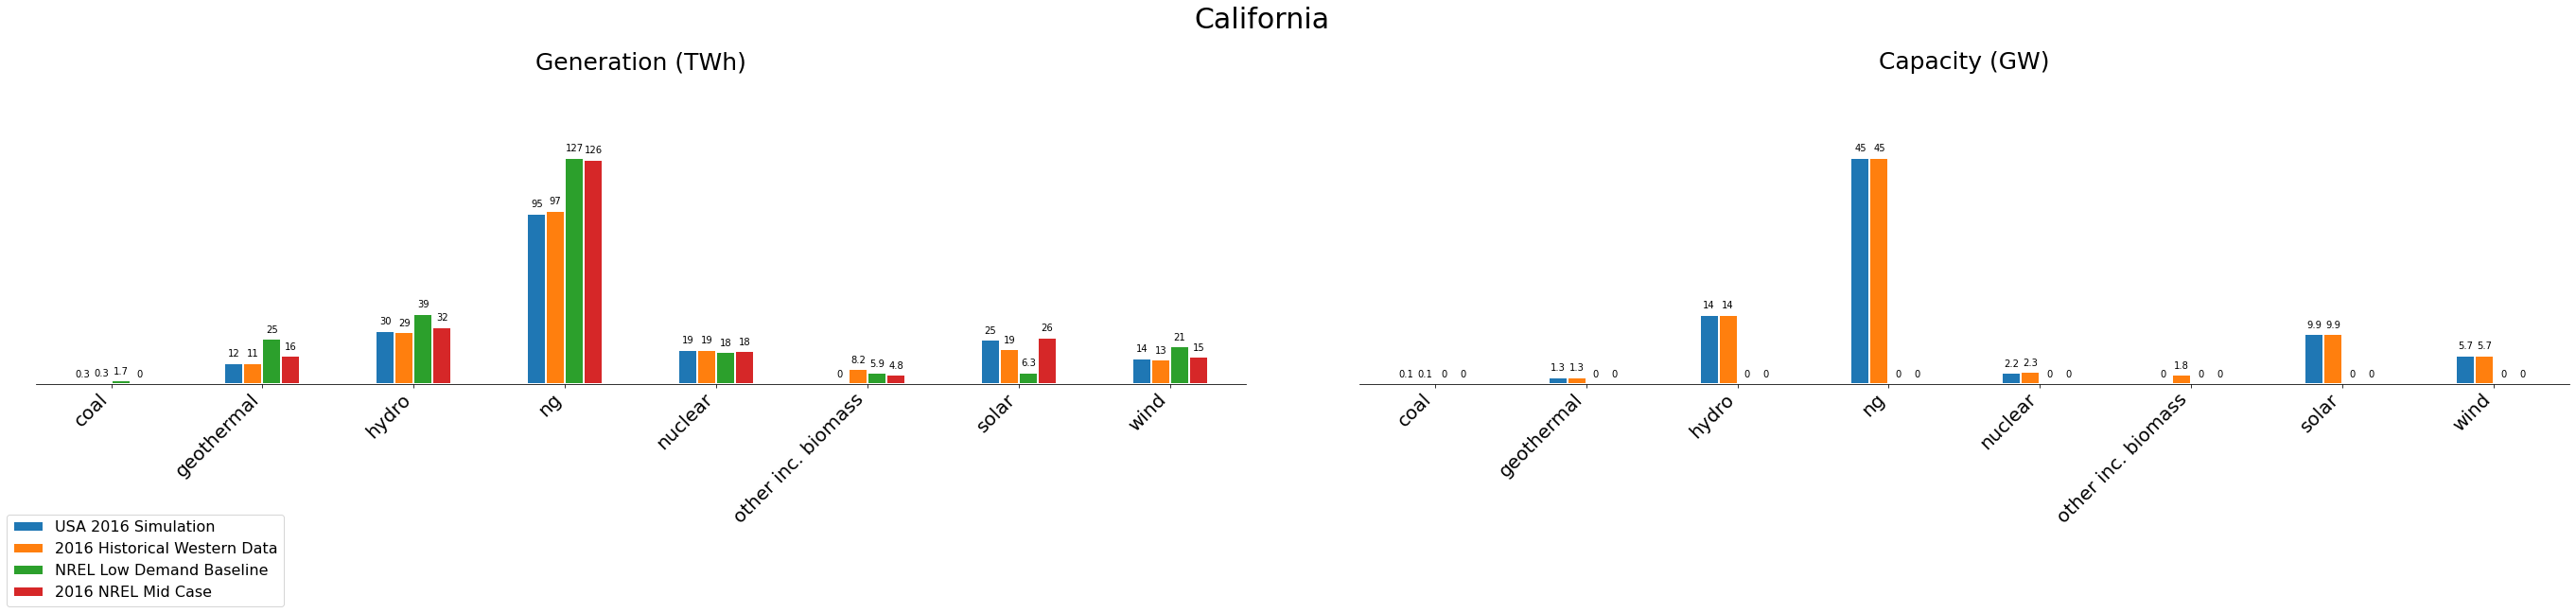

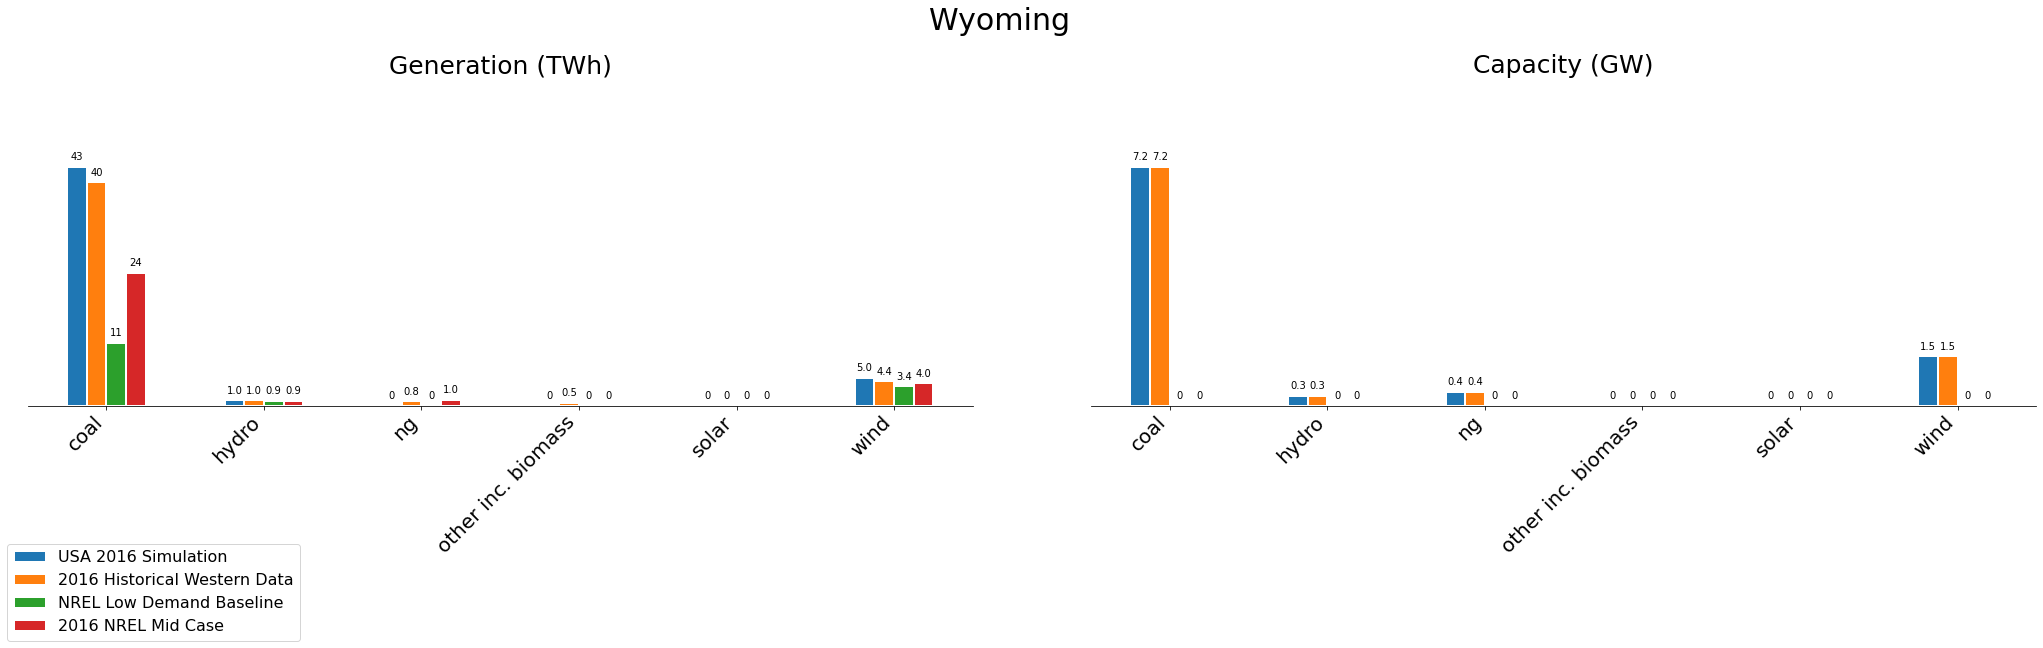

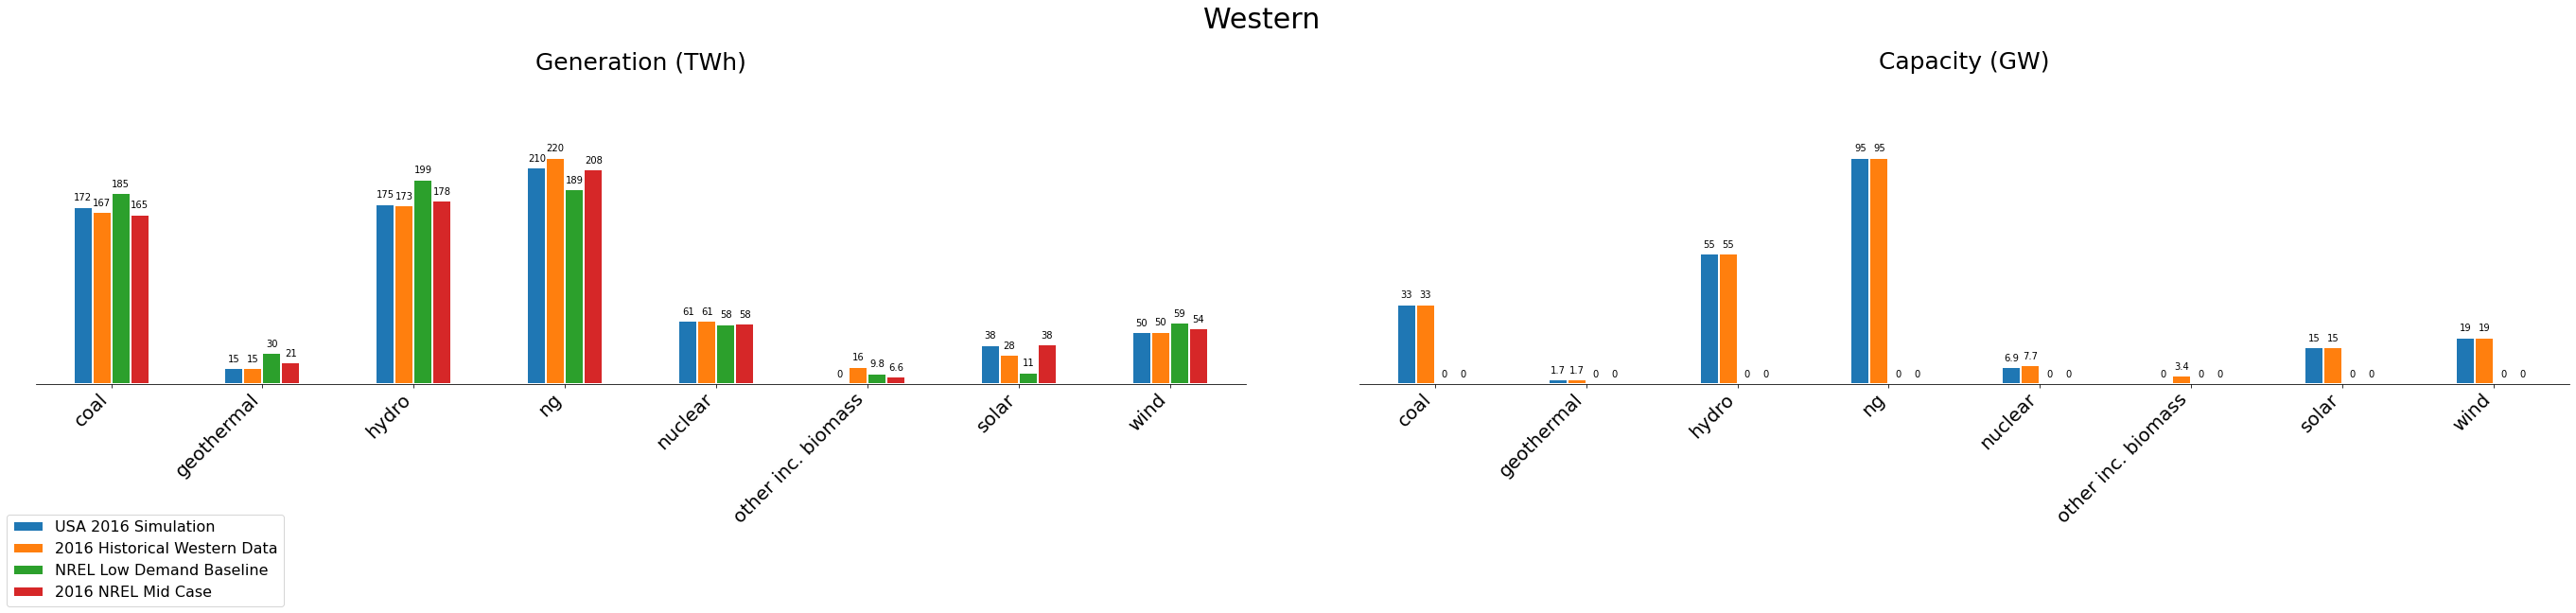

In [7]:
with PrintManager():
    plot_bar_generation_vs_capacity(
        areas=interest_areas, 
        scenario_ids=[823], 
        scenario_names=["USA 2016 Simulation"],
        custom_data=custom_data,
    )